In [1]:
#Dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import matplotlib.transforms as mtransforms

numb = 5
# Read the crime data summary file
crs_path = "datasource/crime_sum.csv"
sum_df = pd.read_csv(crs_path)
print(sum_df.head())

# Read the crime data detail
cr_path = "datasource/crime_out.csv"
det_df = pd.read_csv(cr_path)
print(det_df.head())

# Read the Salary data
sal_path = "datasource/salary_out.csv"
sal_df = pd.read_csv(sal_path)
sal_df.head()

# Read the Election data
election_path = "datasource/election_out.csv"
election_df = pd.read_csv(election_path)
election_df.head()


    jurisdiction  crime_per_pop
0          MAINE       0.118875
1        VERMONT       0.125750
2  NEW HAMPSHIRE       0.174875
3   NORTH DAKOTA       0.192875
4           UTAH       0.226625
  jurisdiction  year  state_population  violent_crime_total  crime_per_pop
0      ALABAMA  2001         4468912.0              19582.0          0.438
1       ALASKA  2001          633630.0               3735.0          0.589
2      ARIZONA  2001         5306966.0              28675.0          0.540
3     ARKANSAS  2001         2694698.0              12190.0          0.452
4   CALIFORNIA  2001        34600463.0             212867.0          0.615


,State,Year,Democrat,Republican,Winner
0,Alabama,2000,695602.0,944409.0,Republican
1,Alaska,2000,79004.0,167398.0,Republican
2,Arizona,2000,685341.0,781652.0,Republican
3,Arkansas,2000,422768.0,472940.0,Republican
4,California,2000,5861203.0,4567429.0,Democrat


    jurisdiction  crime_per_pop
0          MAINE       0.118875
1        VERMONT       0.125750
2  NEW HAMPSHIRE       0.174875
3   NORTH DAKOTA       0.192875
4           UTAH       0.226625
  jurisdiction  year  state_population  violent_crime_total  crime_per_pop
0      ALABAMA  2001         4468912.0              19582.0          0.438
1       ALASKA  2001          633630.0               3735.0          0.589
2      ARIZONA  2001         5306966.0              28675.0          0.540
3     ARKANSAS  2001         2694698.0              12190.0          0.452
4   CALIFORNIA  2001        34600463.0             212867.0          0.615


,State,Year,Democrat,Republican,Winner
0,Alabama,2000,695602.0,944409.0,Republican
1,Alaska,2000,79004.0,167398.0,Republican
2,Arizona,2000,685341.0,781652.0,Republican
3,Arkansas,2000,422768.0,472940.0,Republican
4,California,2000,5861203.0,4567429.0,Democrat


In [2]:
# Function to plot the graph
#def plot_line (x_axis, y_axis, crime_per_pop, def_color):
#    plt.plot(x_axis, y_axis, color=def_color)
#    plt.plot(x_axis, crime_per_pop, color="red")
#    plt.grid(True)
#    plt.show()
#    return

def plot_line2 (state, x_axis, y_axis, crime_per_pop, def_color, winner):
    fig, ax1 = plt.subplots()
    ax1.plot(x_axis, y_axis, color=def_color)
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Salary in $")
    ax1.legend('$', loc='upper left', frameon=False)
    
    #ax1.legend('Median Salary', frameon=False, ncol=2)
    colors = winner.replace({'Democrat':'b','Republican':'r', 'Other Party':'g'})
    
    for i, row in colors.iterrows():
        plt.axvspan(row[0], row[0]+4, facecolor=row[1], alpha=0.1)
    plt.xticks(colors['Year'])
    plt.xlim(2000, 2016)
    
    ax2 = ax1.twinx()
    
    ax2.plot(x_axis,crime_per_pop, color="red")
    ax2.set_ylabel("Crime_per_Pop %")
    ax2.legend("C", loc='upper right', frameon=False)
    
    #plt.legend(["y_axis", "crime_per_pop"])
    plt.title(state)
    return

     # Create an array that contains the year and the winning party

Top 5 Lowest Crime Data
-----------------
Top 5 Lowest Crime Data
-----------------


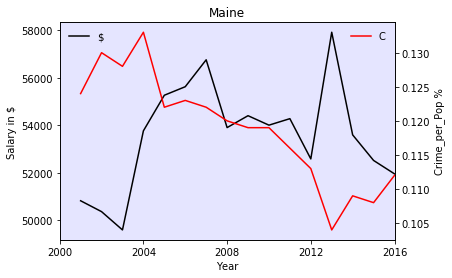

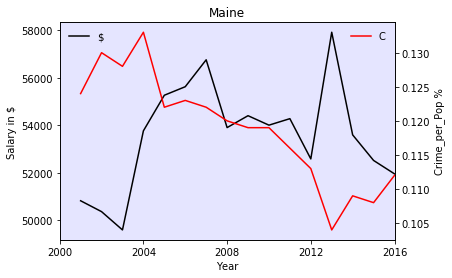

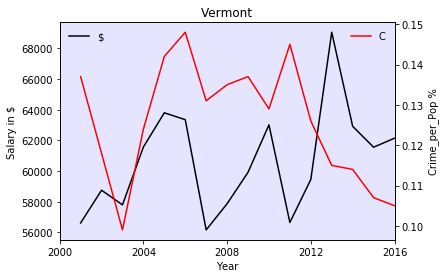

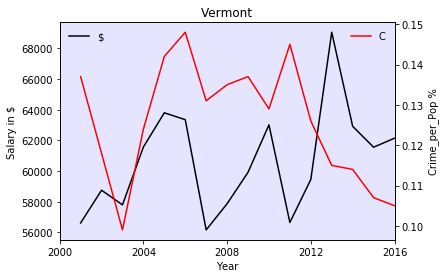

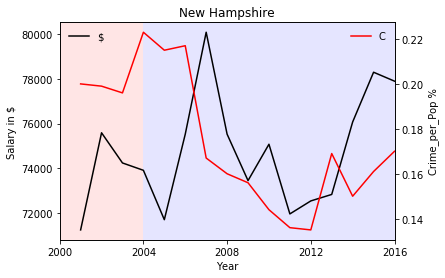

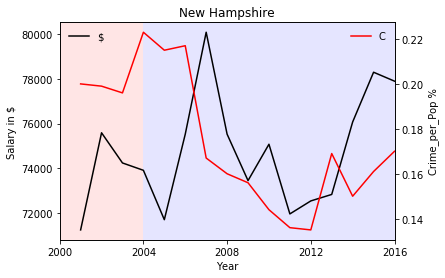

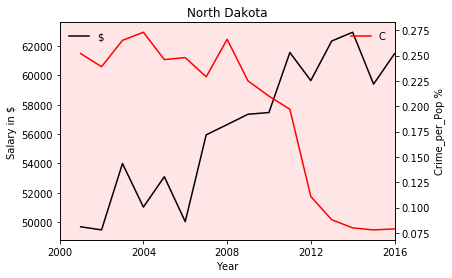

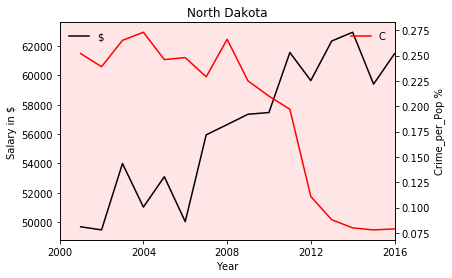

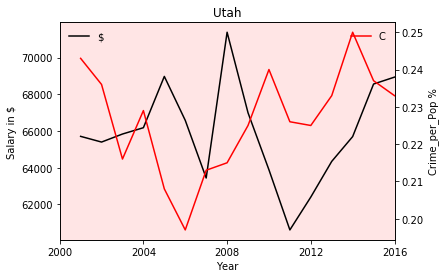

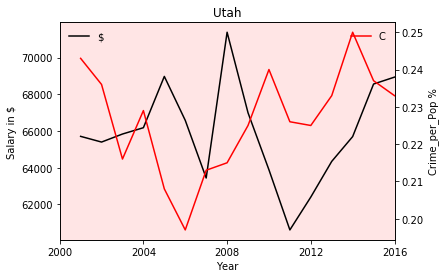

In [3]:
# plot_line(sal_df["year"], sal_df["crime_per_pop"], "")
state = sum_df["jurisdiction"].head(numb)
print(f'Top {numb} Lowest Crime Data')
print("-----------------")
for each_state in state:
    state_name = each_state.title()
  
    s_df = sal_df.loc[sal_df["state"] == state_name,:]
    s2_df = s_df.set_index("year")
      
    c_df = det_df.loc[det_df["jurisdiction"] == each_state,:]
    c2_df = c_df.set_index("year")
    
    state_winner = election_df.loc[election_df['State']==state_name,['Year','Winner']]
    
    #print(f'g2_df index {s2_df.index}')
    #print(f'g2_df salary {s2_df["salary"]}')
    #print(f'c2_df crime per pop {c2_df["crime_per_pop"]}')
    plot_line2(state_name, s2_df.index, s2_df["salary"], c2_df["crime_per_pop"], "black", state_winner)
    plt.savefig(f'output/{state_name}.png')

Top 5 Highest Crime Data
------------------------------
Top 5 Highest Crime Data
------------------------------


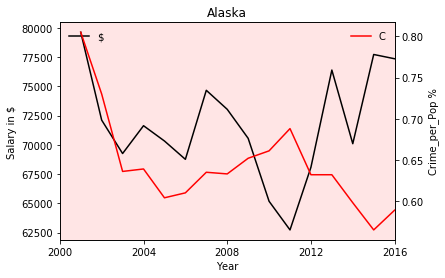

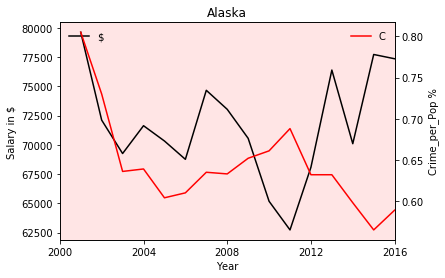

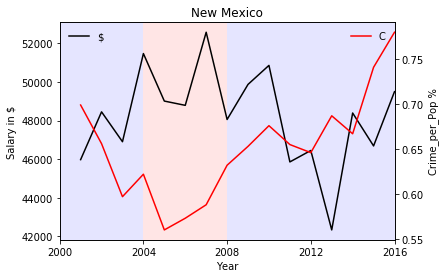

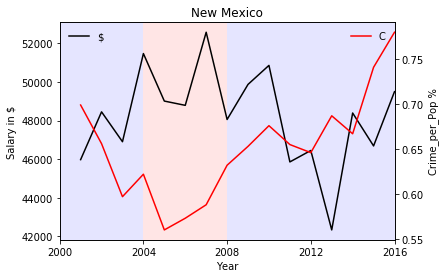

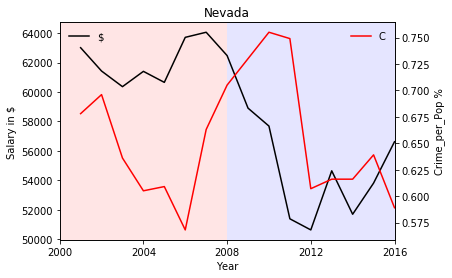

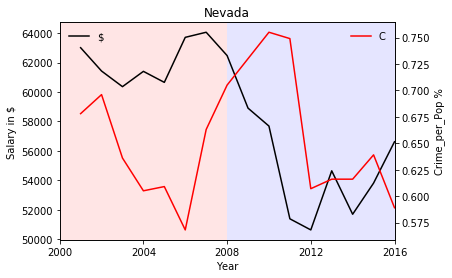

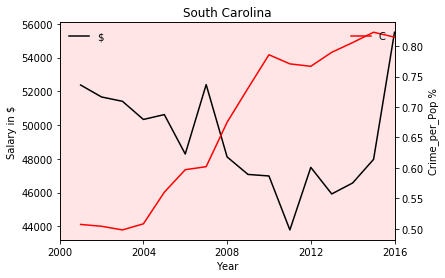

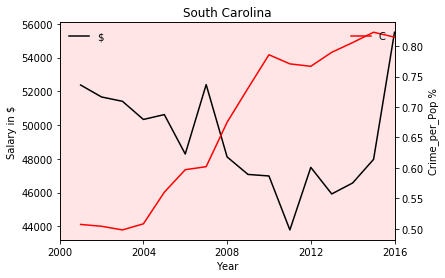

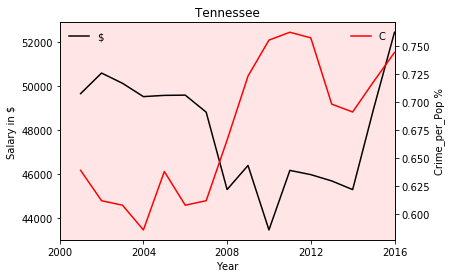

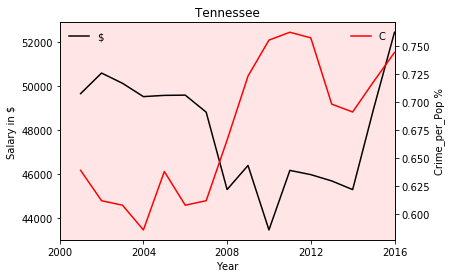

In [5]:
state = sum_df["jurisdiction"].tail(numb)
print(f'Top {numb} Highest Crime Data')
print("------------------------------")
for each_state in state:
    state_name = each_state.title()
  
    s_df = sal_df.loc[sal_df["state"] == state_name,:]
    s2_df = s_df.set_index("year")
      
    c_df = det_df.loc[det_df["jurisdiction"] == each_state,:]
    c2_df = c_df.set_index("year")
    
    state_winner = election_df.loc[election_df['State']==state_name,['Year','Winner']]
    
    #print(f'g2_df index {s2_df.index}')
    #print(f'g2_df salary {s2_df["salary"]}')
    #print(f'c2_df crime per pop {c2_df["crime_per_pop"]}')
    plot_line2(state_name, s2_df.index, s2_df["salary"], c2_df["crime_per_pop"], "black", state_winner)
    plt.savefig(f'output/{state_name}.png')
  

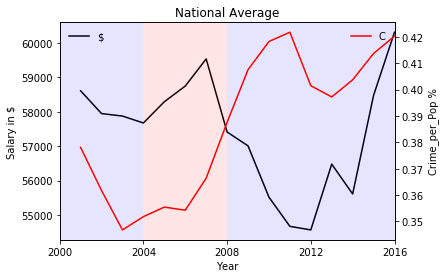

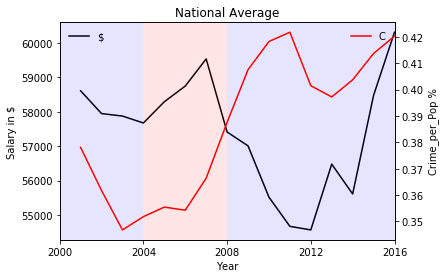

In [14]:
crime_per_year = det_df.groupby("year")["crime_per_pop"].mean()

sal_per_year = sal_df.head(16)
sal_per_year = sal_per_year.drop(columns=['state'])
year = sal_per_year.drop(columns=['salary'])

fig, ax1 = plt.subplots()
ax1.plot(year, sal_per_year["salary"], color = "black")
ax1.set_xlabel("Year")
ax1.set_ylabel("Salary in $")
ax1.legend('$', loc='upper left', frameon=False)
    
ax2 = ax1.twinx()

colors = [[2000, "b"], [2004, "r"], [2008, "b"], [2012, "b"]]

for color in colors:
    plt.axvspan(color[0], color[0]+4, facecolor=color[1], alpha=0.1)
plt.xticks([2000,2004,2008,2012,2016])
plt.xlim(2000, 2016)

ax2.plot(year,crime_per_year, color="red")
ax2.set_ylabel("Crime_per_Pop %")
ax2.legend("C", loc='upper right', frameon=False)
plt.title("National Average")
plt.savefig('output/nat_avg.png')

In [ ]:
# Create an array that contains the year and the winning party

# e_df = election_df.loc[election_df["State"] == state_name, :]
# e2_df = election_df.set_index("Year")
# print(e2_df, )